# Evidence of Discrimination?

The Department of Developmental Services (DDS) in California is responsible for allocating funds to support over 250,000 developmentally-disabled residents. The data set `ca_dds_expenditures.csv` contains data about 1,000 of these residents. The data comes from a discrimination lawsuit which alleged that California's Department of Developmental Services (DDS) privileged white (non-Hispanic) residents over Hispanic residents in allocating funds. We will focus on comparing the allocation of funds (i.e., expenditures) for these two ethnicities only, although there are other ethnicities in this data set.

There are 6 variables in this data set:

- Id:  5-digit, unique identification code for each consumer (similar to a social security number and used for identification purposes)  
- Age Cohort:  Binned age variable represented as six age cohorts (0-5, 6-12, 13-17, 18-21, 22-50, and 51+)
- Age:  Unbinned age variable
- Gender:  Male or Female
- Expenditures:  Dollar amount of annual expenditures spent on each consumer
- Ethnicity:  Eight ethnic groups (American Indian, Asian, Black, Hispanic, Multi-race, Native Hawaiian, Other, and White non-Hispanic)

# Question 1

Read in the data set. Make a graphic that compares the _average_ expenditures by the DDS on Hispanic residents and white (non-Hispanic) residents. Comment on what you see.

In [10]:
#imports
import pandas as pd
import numpy as np

#show everything that gets printed, not just last thing
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#read data
df = pd.read_csv("ca_dds_expenditures.csv")
df

,Id,Age Cohort,Age,Gender,Expenditures,Ethnicity
0,10210,13 to 17,17,Female,2113,White not Hispanic
1,10409,22 to 50,37,Male,41924,White not Hispanic
2,10486,0 to 5,3,Male,1454,Hispanic
3,10538,18 to 21,19,Female,6400,Hispanic
4,10568,13 to 17,13,Male,4412,White not Hispanic
...,...,...,...,...,...,...
995,99622,51+,86,Female,57055,White not Hispanic
996,99715,18 to 21,20,Male,7494,Hispanic
997,99718,13 to 17,17,Female,3673,Multi Race
998,99791,6 to 12,10,Male,3638,Hispanic


<AxesSubplot:xlabel='Ethnicity'>

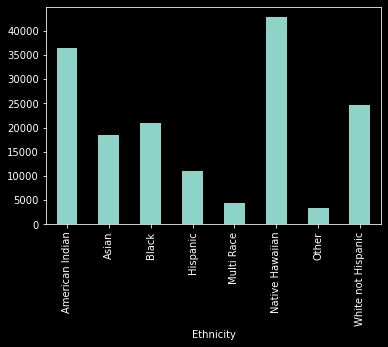

In [11]:
# df.groupby("Ethnicity").sum()["Expenditures"]
# df.groupby("Ethnicity").count()["Expenditures"]

#create series of
average = df.groupby("Ethnicity").sum()["Expenditures"] / df.groupby("Ethnicity").count()["Expenditures"]
average.plot.bar()


<AxesSubplot:xlabel='Ethnicity'>

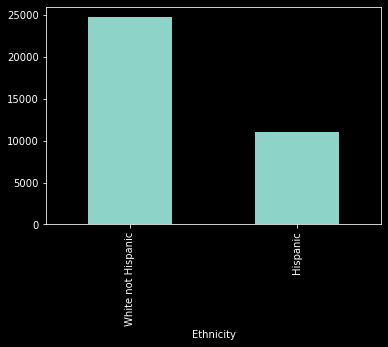

In [12]:
average2 = average.loc[["White not Hispanic", "Hispanic"]]
average2.plot.bar()

## White not hispanic received around 2x as much funding on average, but as we can see from the table above, there are large disparities between all racial groups. The discrepancy appears to be quite large however, with Native Hawaiians receiving over 8x as much as people listed as other!


# Question 2

Now, calculate the average expenditures by ethnicity and age cohort. Make a graphic that compares the average expenditure on Hispanic residents and white (non-Hispanic) residents, _within each age cohort_. 

Comment on what you see. How do these results appear to contradict the results you obtained in Question 1?

<AxesSubplot:ylabel='Ethnicity'>

<AxesSubplot:xlabel='Ethnicity'>

<AxesSubplot:xlabel='Ethnicity'>

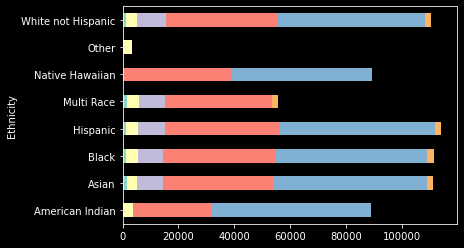

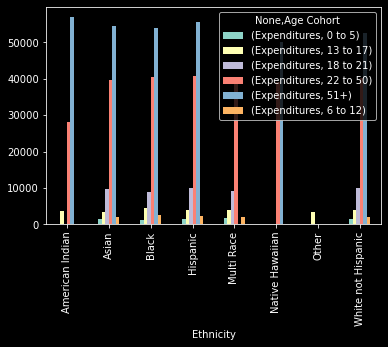

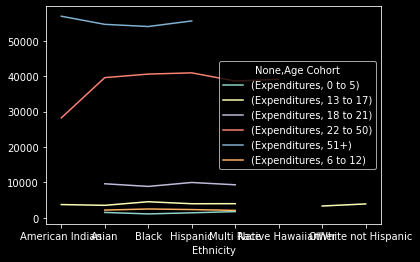

In [13]:
# YOUR CODE HERE
df_temp = df.pivot_table(values=["Expenditures"], index=["Ethnicity"], columns = ["Age Cohort"], aggfunc=np.mean)
df_temp.plot.barh(stacked=True,legend=False)
df_temp.plot.bar()
df_temp.plot()

## As age increases, there is a sharp increase in expenditures across all races. It also shows that the reason for Native Hawaiian recipients receiving the most is because there is a small sample size and all of the Native Hawaiians in the dataset are older. When age is considered, it looks like all races receive about equal expenditures.

# Question 3

Can you explain the discrepancy between the two analyses you conducted above (i.e., Questions 1 and 2)? Try to tell a complete story that interweaves tables, graphics, and explanation.

_Hint:_ You might want to consider looking at:

- the distributions of ages of Hispanics and whites
- the average expenditure as a function of age

## When you look at the average expenditures of Californias DDS based upon race, it initially appears that there is severe discrimination through discrepencies in funding, however, a more detailed look including age - a confounding variable - shows that just taking the average expenditure of each racial group doesn't tell the whole story.

In [14]:
df_temp = df.pivot_table(values=["Expenditures"], index=["Ethnicity"], columns = ["Age Cohort"], aggfunc=len)
df_temp

Expenditures                                         
Age Cohort               0 to 5 13 to 17 18 to 21 22 to 50   51+ 6 to 12
Ethnicity                                                               
American Indian             NaN      1.0      NaN      1.0   2.0     NaN
Asian                       8.0     20.0     41.0     29.0  13.0    18.0
Black                       3.0     12.0      9.0     17.0   7.0    11.0
Hispanic                   44.0    103.0     78.0     43.0  17.0    91.0
Multi Race                  7.0      7.0      2.0      1.0   NaN     9.0
Native Hawaiian             NaN      NaN      NaN      2.0   1.0     NaN
Other                       NaN      2.0      NaN      NaN   NaN     NaN
White not Hispanic         20.0     67.0     69.0    133.0  66.0    46.0

## Below is the age distribution of hispanics in the dataset

<AxesSubplot:ylabel='Hispanic'>

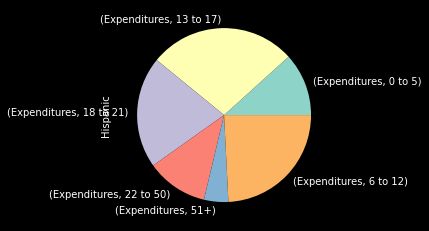

In [15]:

df_temp2 = df_temp.loc["Hispanic"]
df_temp2.plot.pie()
# df_temp = df.pivot_table(values=["Expenditures"], index=["Ethnicity"], columns = ["Age Cohort"], aggfunc=np.mean)


## Below is the age distribution of whites in the dataset

<AxesSubplot:ylabel='White not Hispanic'>

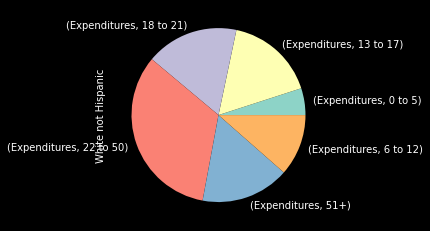

In [16]:

df_temp3 = df_temp.loc["White not Hispanic"]
df_temp3.plot.pie()

## As can be seen from these two pie charts, the age distribution of whites is skewed towards elderly people (22-50 and 51+ categories) which are more expensive than the 0 to 5 and 6 to 12 categories which are more larger slices of the hispanic population. The plot below illustrates that by age, spending is pretty uniform across races.

<AxesSubplot:ylabel='Ethnicity'>

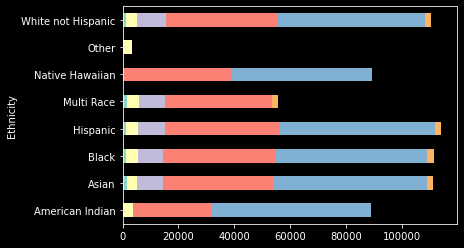

In [17]:
df_temp = df.pivot_table(values=["Expenditures"], index=["Ethnicity"], columns = ["Age Cohort"], aggfunc=np.mean)
df_temp.plot.barh(stacked=True,legend=False)

## Finally, below is a plot of expenditures based on age disregarding age - elderly people are quite a bit more expensive! This further confirms the findings above.

Age Cohort,0 to 5,13 to 17,18 to 21,22 to 50,51+,6 to 12
Expenditures,1415.280488,3922.613208,9888.537688,40209.283186,53521.896226,2226.862857


<AxesSubplot:>

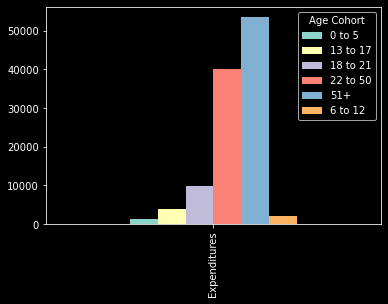

In [18]:
df_temp = df.pivot_table(values=["Expenditures"], columns = ["Age Cohort"], aggfunc=np.mean)
df_temp
df_temp.plot.bar()